In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing and splitting data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# For evaluating models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

# For deep learning (TensorFlow/Keras)
import tensorflow as tf
from tensorflow import keras

# xgboost
import xgboost as xgb


In [42]:
# Load the dataset
path = "../OraclesElixir/OE2024.csv"
raw_df = pd.read_csv(path, low_memory=False)
raw_df

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
0,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114283,LOLTMNT02_181861,complete,NaN,HW,2024,NaN,0,2024-11-03 21:08:36,5,14.18,...,200.0,716.0,2609.0,14.0,1.0,6.0,0.0,1.0,2.0,3.0
114284,LOLTMNT02_181861,complete,NaN,HW,2024,NaN,0,2024-11-03 21:08:36,5,14.18,...,264.0,-445.0,1274.0,-28.0,1.0,5.0,0.0,1.0,2.0,0.0
114285,LOLTMNT02_181861,complete,NaN,HW,2024,NaN,0,2024-11-03 21:08:36,5,14.18,...,36.0,151.0,1043.0,8.0,1.0,5.0,2.0,0.0,3.0,1.0
114286,LOLTMNT02_181861,complete,NaN,HW,2024,NaN,0,2024-11-03 21:08:36,5,14.18,...,862.0,-2295.0,-7637.0,8.0,4.0,9.0,9.0,9.0,23.0,4.0


In [43]:
complete_data = raw_df[raw_df['datacompleteness'] == 'complete']
complete_data.drop(columns=['datacompleteness', 'url'], inplace=True)
complete_data

/var/folders/0h/ch124vqs7dj_96gjw7qq3ksh0000gn/T/ipykernel_95090/2485678526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_data.drop(columns=['datacompleteness', 'url'], inplace=True)


,gameid,league,year,split,playoffs,date,game,patch,participantid,side,...,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
180,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,1,Blue,...,207.0,1928.0,1127.0,3.0,4.0,4.0,1.0,1.0,1.0,3.0
181,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,2,Blue,...,154.0,2943.0,1955.0,0.0,5.0,11.0,1.0,2.0,3.0,2.0
182,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,3,Blue,...,190.0,660.0,2223.0,18.0,1.0,8.0,3.0,1.0,4.0,3.0
183,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,4,Blue,...,170.0,5016.0,2473.0,64.0,8.0,7.0,1.0,1.0,4.0,5.0
184,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,5,Blue,...,31.0,2194.0,3049.0,-6.0,2.0,17.0,1.0,2.0,2.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114283,LOLTMNT02_181861,HW,2024,NaN,0,2024-11-03 21:08:36,5,14.18,8,Red,...,200.0,716.0,2609.0,14.0,1.0,6.0,0.0,1.0,2.0,3.0
114284,LOLTMNT02_181861,HW,2024,NaN,0,2024-11-03 21:08:36,5,14.18,9,Red,...,264.0,-445.0,1274.0,-28.0,1.0,5.0,0.0,1.0,2.0,0.0
114285,LOLTMNT02_181861,HW,2024,NaN,0,2024-11-03 21:08:36,5,14.18,10,Red,...,36.0,151.0,1043.0,8.0,1.0,5.0,2.0,0.0,3.0,1.0
114286,LOLTMNT02_181861,HW,2024,NaN,0,2024-11-03 21:08:36,5,14.18,100,Blue,...,862.0,-2295.0,-7637.0,8.0,4.0,9.0,9.0,9.0,23.0,4.0


In [44]:
cols = complete_data.columns 
for (i, col) in enumerate(cols):
    print(i, col)

0 gameid
1 league
2 year
3 split
4 playoffs
5 date
6 game
7 patch
8 participantid
9 side
10 position
11 playername
12 playerid
13 teamname
14 teamid
15 champion
16 ban1
17 ban2
18 ban3
19 ban4
20 ban5
21 pick1
22 pick2
23 pick3
24 pick4
25 pick5
26 gamelength
27 result
28 kills
29 deaths
30 assists
31 teamkills
32 teamdeaths
33 doublekills
34 triplekills
35 quadrakills
36 pentakills
37 firstblood
38 firstbloodkill
39 firstbloodassist
40 firstbloodvictim
41 team kpm
42 ckpm
43 firstdragon
44 dragons
45 opp_dragons
46 elementaldrakes
47 opp_elementaldrakes
48 infernals
49 mountains
50 clouds
51 oceans
52 chemtechs
53 hextechs
54 dragons (type unknown)
55 elders
56 opp_elders
57 firstherald
58 heralds
59 opp_heralds
60 void_grubs
61 opp_void_grubs
62 firstbaron
63 barons
64 opp_barons
65 firsttower
66 towers
67 opp_towers
68 firstmidtower
69 firsttothreetowers
70 turretplates
71 opp_turretplates
72 inhibitors
73 opp_inhibitors
74 damagetochampions
75 dpm
76 damageshare
77 damagetakenpermi

In [45]:
# Select the first 14 columns and any columns containing '15'
fifteen_df = complete_data.loc[:, list(complete_data.columns[:14]) + [col for col in complete_data.columns if '15' in col]]

# Add the 'game_result' column by selecting it with .loc[] (assuming 'gameid' exists)
fifteen_df['game_result'] = complete_data.loc[:, 'result']

# Check the resulting dataframe
fifteen_df

,gameid,league,year,split,playoffs,date,game,patch,participantid,side,...,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,game_result
180,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,1,Blue,...,-575.0,-603.0,-8.0,0.0,0.0,0.0,1.0,0.0,0.0,1
181,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,2,Blue,...,236.0,-107.0,-6.0,2.0,2.0,1.0,1.0,1.0,0.0,1
182,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,3,Blue,...,-409.0,39.0,-4.0,0.0,1.0,1.0,0.0,2.0,0.0,1
183,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,4,Blue,...,2811.0,1047.0,40.0,4.0,2.0,0.0,0.0,1.0,3.0,1
184,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,5,Blue,...,230.0,573.0,1.0,0.0,5.0,1.0,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114283,LOLTMNT02_181861,HW,2024,NaN,0,2024-11-03 21:08:36,5,14.18,8,Red,...,-81.0,359.0,-8.0,1.0,1.0,0.0,0.0,2.0,2.0,1
114284,LOLTMNT02_181861,HW,2024,NaN,0,2024-11-03 21:08:36,5,14.18,9,Red,...,-823.0,-265.0,-11.0,0.0,0.0,0.0,1.0,1.0,0.0,1
114285,LOLTMNT02_181861,HW,2024,NaN,0,2024-11-03 21:08:36,5,14.18,10,Red,...,-453.0,-272.0,6.0,0.0,0.0,1.0,0.0,2.0,0.0,1
114286,LOLTMNT02_181861,HW,2024,NaN,0,2024-11-03 21:08:36,5,14.18,100,Blue,...,1380.0,183.0,24.0,3.0,6.0,3.0,3.0,2.0,3.0,0


In [46]:
fifteen_df.head(15)

,gameid,league,year,split,playoffs,date,game,patch,participantid,side,...,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,game_result
180,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,1,Blue,...,-575.0,-603.0,-8.0,0.0,0.0,0.0,1.0,0.0,0.0,1
181,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,2,Blue,...,236.0,-107.0,-6.0,2.0,2.0,1.0,1.0,1.0,0.0,1
182,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,3,Blue,...,-409.0,39.0,-4.0,0.0,1.0,1.0,0.0,2.0,0.0,1
183,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,4,Blue,...,2811.0,1047.0,40.0,4.0,2.0,0.0,0.0,1.0,3.0,1
184,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,5,Blue,...,230.0,573.0,1.0,0.0,5.0,1.0,1.0,1.0,3.0,1
185,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,6,Red,...,575.0,603.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0
186,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,7,Red,...,-236.0,107.0,6.0,1.0,1.0,0.0,2.0,2.0,1.0,0
187,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,8,Red,...,409.0,-39.0,4.0,0.0,2.0,0.0,0.0,1.0,1.0,0
188,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,9,Red,...,-2811.0,-1047.0,-40.0,0.0,1.0,3.0,4.0,2.0,0.0,0
189,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,10,Red,...,-230.0,-573.0,-1.0,1.0,1.0,3.0,0.0,5.0,1.0,0


In [47]:
# participantid = 100 is team 1 aggregate stats, participantid = 200 is team 2 aggregate stats. only keep these columns
fifteen_df = fifteen_df[(fifteen_df['participantid'] == 100) | (fifteen_df['participantid'] == 200)]
fifteen_df

,gameid,league,year,split,playoffs,date,game,patch,participantid,side,...,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,game_result
190,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,100,Blue,...,2293.0,949.0,23.0,6.0,10.0,3.0,3.0,5.0,6.0,1
191,LOLTMNT99_132542,TSC,2024,Winter,0,2024-01-05 14:08:39,1,14.01,200,Red,...,-2293.0,-949.0,-23.0,3.0,5.0,6.0,6.0,10.0,3.0,0
202,LOLTMNT99_132665,TSC,2024,Winter,0,2024-01-05 15:03:35,1,14.01,100,Blue,...,-75.0,1092.0,12.0,8.0,12.0,6.0,6.0,5.0,8.0,1
203,LOLTMNT99_132665,TSC,2024,Winter,0,2024-01-05 15:03:35,1,14.01,200,Red,...,75.0,-1092.0,-12.0,6.0,5.0,8.0,8.0,12.0,6.0,0
214,LOLTMNT99_132755,TSC,2024,Winter,0,2024-01-05 16:10:07,1,14.01,100,Blue,...,-561.0,410.0,-36.0,4.0,6.0,4.0,4.0,7.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114263,LOLTMNT02_181859,HW,2024,NaN,0,2024-11-03 19:12:46,3,14.18,200,Red,...,-397.0,1533.0,-32.0,10.0,22.0,7.0,7.0,15.0,11.0,0
114274,LOLTMNT02_182099,HW,2024,NaN,0,2024-11-03 20:13:00,4,14.18,100,Blue,...,-110.0,-3270.0,-37.0,4.0,10.0,6.0,6.0,16.0,4.0,1
114275,LOLTMNT02_182099,HW,2024,NaN,0,2024-11-03 20:13:00,4,14.18,200,Red,...,110.0,3270.0,37.0,6.0,16.0,4.0,4.0,10.0,6.0,0
114286,LOLTMNT02_181861,HW,2024,NaN,0,2024-11-03 21:08:36,5,14.18,100,Blue,...,1380.0,183.0,24.0,3.0,6.0,3.0,3.0,2.0,3.0,0


In [48]:
cols = fifteen_df.columns
print(cols)

Index(['gameid', 'league', 'year', 'split', 'playoffs', 'date', 'game',
       'patch', 'participantid', 'side', 'position', 'playername', 'playerid',
       'teamname', 'goldat15', 'xpat15', 'csat15', 'opp_goldat15',
       'opp_xpat15', 'opp_csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15',
       'killsat15', 'assistsat15', 'deathsat15', 'opp_killsat15',
       'opp_assistsat15', 'opp_deathsat15', 'game_result'],
      dtype='object')


In [49]:
drop_cols = ['league', 'game', 'year', 'split', 'playoffs', 'date', 'patch', 'position', 'playername', 'playerid']
fifteen_df.drop(columns=drop_cols, inplace=True)
fifteen_df

/var/folders/0h/ch124vqs7dj_96gjw7qq3ksh0000gn/T/ipykernel_95090/3830818407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifteen_df.drop(columns=drop_cols, inplace=True)


,gameid,participantid,side,teamname,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,game_result
190,LOLTMNT99_132542,100,Blue,BoostGate Esports,27034.0,30021.0,530.0,24741.0,29072.0,507.0,2293.0,949.0,23.0,6.0,10.0,3.0,3.0,5.0,6.0,1
191,LOLTMNT99_132542,200,Red,Dark Passage,24741.0,29072.0,507.0,27034.0,30021.0,530.0,-2293.0,-949.0,-23.0,3.0,5.0,6.0,6.0,10.0,3.0,0
202,LOLTMNT99_132665,100,Blue,unknown team,25949.0,30435.0,505.0,26024.0,29343.0,493.0,-75.0,1092.0,12.0,8.0,12.0,6.0,6.0,5.0,8.0,1
203,LOLTMNT99_132665,200,Red,unknown team,26024.0,29343.0,493.0,25949.0,30435.0,505.0,75.0,-1092.0,-12.0,6.0,5.0,8.0,8.0,12.0,6.0,0
214,LOLTMNT99_132755,100,Blue,unknown team,24170.0,29638.0,472.0,24731.0,29228.0,508.0,-561.0,410.0,-36.0,4.0,6.0,4.0,4.0,7.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114263,LOLTMNT02_181859,200,Red,eSuba,26619.0,30211.0,447.0,27016.0,28678.0,479.0,-397.0,1533.0,-32.0,10.0,22.0,7.0,7.0,15.0,11.0,0
114274,LOLTMNT02_182099,100,Blue,eSuba,25227.0,26217.0,462.0,25337.0,29487.0,499.0,-110.0,-3270.0,-37.0,4.0,10.0,6.0,6.0,16.0,4.0,1
114275,LOLTMNT02_182099,200,Red,Entropiq,25337.0,29487.0,499.0,25227.0,26217.0,462.0,110.0,3270.0,37.0,6.0,16.0,4.0,4.0,10.0,6.0,0
114286,LOLTMNT02_181861,100,Blue,Entropiq,25134.0,31374.0,555.0,23754.0,31191.0,531.0,1380.0,183.0,24.0,3.0,6.0,3.0,3.0,2.0,3.0,0


In [50]:
fifteen_df.dropna(inplace=True)
fifteen_df.reset_index(drop=True, inplace=True)
fifteen_df

/var/folders/0h/ch124vqs7dj_96gjw7qq3ksh0000gn/T/ipykernel_95090/3600329878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifteen_df.dropna(inplace=True)


,gameid,participantid,side,teamname,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,game_result
0,LOLTMNT99_132542,100,Blue,BoostGate Esports,27034.0,30021.0,530.0,24741.0,29072.0,507.0,2293.0,949.0,23.0,6.0,10.0,3.0,3.0,5.0,6.0,1
1,LOLTMNT99_132542,200,Red,Dark Passage,24741.0,29072.0,507.0,27034.0,30021.0,530.0,-2293.0,-949.0,-23.0,3.0,5.0,6.0,6.0,10.0,3.0,0
2,LOLTMNT99_132665,100,Blue,unknown team,25949.0,30435.0,505.0,26024.0,29343.0,493.0,-75.0,1092.0,12.0,8.0,12.0,6.0,6.0,5.0,8.0,1
3,LOLTMNT99_132665,200,Red,unknown team,26024.0,29343.0,493.0,25949.0,30435.0,505.0,75.0,-1092.0,-12.0,6.0,5.0,8.0,8.0,12.0,6.0,0
4,LOLTMNT99_132755,100,Blue,unknown team,24170.0,29638.0,472.0,24731.0,29228.0,508.0,-561.0,410.0,-36.0,4.0,6.0,4.0,4.0,7.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16257,LOLTMNT02_181859,200,Red,eSuba,26619.0,30211.0,447.0,27016.0,28678.0,479.0,-397.0,1533.0,-32.0,10.0,22.0,7.0,7.0,15.0,11.0,0
16258,LOLTMNT02_182099,100,Blue,eSuba,25227.0,26217.0,462.0,25337.0,29487.0,499.0,-110.0,-3270.0,-37.0,4.0,10.0,6.0,6.0,16.0,4.0,1
16259,LOLTMNT02_182099,200,Red,Entropiq,25337.0,29487.0,499.0,25227.0,26217.0,462.0,110.0,3270.0,37.0,6.0,16.0,4.0,4.0,10.0,6.0,0
16260,LOLTMNT02_181861,100,Blue,Entropiq,25134.0,31374.0,555.0,23754.0,31191.0,531.0,1380.0,183.0,24.0,3.0,6.0,3.0,3.0,2.0,3.0,0


In [51]:
fifteen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16262 entries, 0 to 16261
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gameid           16262 non-null  object 
 1   participantid    16262 non-null  int64  
 2   side             16262 non-null  object 
 3   teamname         16262 non-null  object 
 4   goldat15         16262 non-null  float64
 5   xpat15           16262 non-null  float64
 6   csat15           16262 non-null  float64
 7   opp_goldat15     16262 non-null  float64
 8   opp_xpat15       16262 non-null  float64
 9   opp_csat15       16262 non-null  float64
 10  golddiffat15     16262 non-null  float64
 11  xpdiffat15       16262 non-null  float64
 12  csdiffat15       16262 non-null  float64
 13  killsat15        16262 non-null  float64
 14  assistsat15      16262 non-null  float64
 15  deathsat15       16262 non-null  float64
 16  opp_killsat15    16262 non-null  float64
 17  opp_assistsa

In [52]:
# participantid is essentially a dummy value for red or blue side, we can drop this and just keep side
if 'participantid' in fifteen_df.columns:
	fifteen_df.drop(columns=['participantid'], inplace=True)
fifteen_df

/var/folders/0h/ch124vqs7dj_96gjw7qq3ksh0000gn/T/ipykernel_95090/3497492981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifteen_df.drop(columns=['participantid'], inplace=True)


,gameid,side,teamname,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,game_result
0,LOLTMNT99_132542,Blue,BoostGate Esports,27034.0,30021.0,530.0,24741.0,29072.0,507.0,2293.0,949.0,23.0,6.0,10.0,3.0,3.0,5.0,6.0,1
1,LOLTMNT99_132542,Red,Dark Passage,24741.0,29072.0,507.0,27034.0,30021.0,530.0,-2293.0,-949.0,-23.0,3.0,5.0,6.0,6.0,10.0,3.0,0
2,LOLTMNT99_132665,Blue,unknown team,25949.0,30435.0,505.0,26024.0,29343.0,493.0,-75.0,1092.0,12.0,8.0,12.0,6.0,6.0,5.0,8.0,1
3,LOLTMNT99_132665,Red,unknown team,26024.0,29343.0,493.0,25949.0,30435.0,505.0,75.0,-1092.0,-12.0,6.0,5.0,8.0,8.0,12.0,6.0,0
4,LOLTMNT99_132755,Blue,unknown team,24170.0,29638.0,472.0,24731.0,29228.0,508.0,-561.0,410.0,-36.0,4.0,6.0,4.0,4.0,7.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16257,LOLTMNT02_181859,Red,eSuba,26619.0,30211.0,447.0,27016.0,28678.0,479.0,-397.0,1533.0,-32.0,10.0,22.0,7.0,7.0,15.0,11.0,0
16258,LOLTMNT02_182099,Blue,eSuba,25227.0,26217.0,462.0,25337.0,29487.0,499.0,-110.0,-3270.0,-37.0,4.0,10.0,6.0,6.0,16.0,4.0,1
16259,LOLTMNT02_182099,Red,Entropiq,25337.0,29487.0,499.0,25227.0,26217.0,462.0,110.0,3270.0,37.0,6.0,16.0,4.0,4.0,10.0,6.0,0
16260,LOLTMNT02_181861,Blue,Entropiq,25134.0,31374.0,555.0,23754.0,31191.0,531.0,1380.0,183.0,24.0,3.0,6.0,3.0,3.0,2.0,3.0,0


In [53]:
fifteen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16262 entries, 0 to 16261
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gameid           16262 non-null  object 
 1   side             16262 non-null  object 
 2   teamname         16262 non-null  object 
 3   goldat15         16262 non-null  float64
 4   xpat15           16262 non-null  float64
 5   csat15           16262 non-null  float64
 6   opp_goldat15     16262 non-null  float64
 7   opp_xpat15       16262 non-null  float64
 8   opp_csat15       16262 non-null  float64
 9   golddiffat15     16262 non-null  float64
 10  xpdiffat15       16262 non-null  float64
 11  csdiffat15       16262 non-null  float64
 12  killsat15        16262 non-null  float64
 13  assistsat15      16262 non-null  float64
 14  deathsat15       16262 non-null  float64
 15  opp_killsat15    16262 non-null  float64
 16  opp_assistsat15  16262 non-null  float64
 17  opp_deathsat

In [54]:
# finalizing df to work for ML

# one-hot encoding side
fifteen_df_encoded = pd.get_dummies(fifteen_df, columns=['side'], drop_first=True)

# training dataset
X = fifteen_df_encoded.drop(columns=['gameid', 'teamname', 'game_result'])

# target variable
y = fifteen_df_encoded['game_result']

X.head()

,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,side_Red
0,27034.0,30021.0,530.0,24741.0,29072.0,507.0,2293.0,949.0,23.0,6.0,10.0,3.0,3.0,5.0,6.0,False
1,24741.0,29072.0,507.0,27034.0,30021.0,530.0,-2293.0,-949.0,-23.0,3.0,5.0,6.0,6.0,10.0,3.0,True
2,25949.0,30435.0,505.0,26024.0,29343.0,493.0,-75.0,1092.0,12.0,8.0,12.0,6.0,6.0,5.0,8.0,False
3,26024.0,29343.0,493.0,25949.0,30435.0,505.0,75.0,-1092.0,-12.0,6.0,5.0,8.0,8.0,12.0,6.0,True
4,24170.0,29638.0,472.0,24731.0,29228.0,508.0,-561.0,410.0,-36.0,4.0,6.0,4.0,4.0,7.0,4.0,False


In [55]:
X.describe()

,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
count,16262.000000,16262.000000,16262.000000,16262.000000,16262.000000,16262.000000,16262.000000,16262.000000,16262.00000,16262.000000,16262.000000,16262.000000,16262.000000,16262.000000,16262.000000
mean,25251.955110,30143.534375,517.173718,25251.955110,30143.534375,517.173718,0.000000,0.000000,0.00000,4.449268,7.520477,4.464887,4.449268,7.520477,4.464887
std,1781.474401,1468.171318,35.742236,1781.474401,1468.171318,35.742236,2896.387279,2021.573566,40.97281,3.011913,5.569000,3.017521,3.011913,5.569000,3.017521
min,19649.000000,22817.000000,300.000000,19649.000000,22817.000000,300.000000,-14440.000000,-9477.000000,-198.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23995.000000,29211.000000,495.000000,23995.000000,29211.000000,495.000000,-1802.750000,-1269.750000,-26.00000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000
50%,25055.000000,30191.000000,519.000000,25055.000000,30191.000000,519.000000,0.000000,0.000000,0.00000,4.000000,6.000000,4.000000,4.000000,6.000000,4.000000
75%,26267.000000,31117.750000,541.000000,26267.000000,31117.750000,541.000000,1802.750000,1269.750000,26.00000,6.000000,11.000000,6.000000,6.000000,11.000000,6.000000
max,37219.000000,36131.000000,636.000000,37219.000000,36131.000000,636.000000,14440.000000,9477.000000,198.00000,30.000000,52.000000,30.000000,30.000000,52.000000,30.000000


In [56]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Step 1: Split the dataset into training and test sets
from sklearn.pipeline import make_pipeline


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Step 2: Create a pipeline with StandardScaler and Logistic Regression
pipeline = make_pipeline(
    StandardScaler(),               # Feature scaling (Standardization)
    LogisticRegression(random_state=42)  # Logistic Regression model
)

# Step 3: Train the model on the training data
pipeline.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print detailed classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix to see how well the model performs for each class
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7431

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       803
           1       0.74      0.76      0.75       824

    accuracy                           0.74      1627
   macro avg       0.74      0.74      0.74      1627
weighted avg       0.74      0.74      0.74      1627


Confusion Matrix:
[[579 224]
 [194 630]]



Most Important Features:
            Feature  Coefficient
6      golddiffat15     0.376565
0          goldat15     0.308414
3      opp_goldat15    -0.303781
8        csdiffat15     0.175346
7        xpdiffat15     0.165401
5        opp_csat15    -0.117817
1            xpat15     0.117749
4        opp_xpat15    -0.110114
2            csat15     0.083401
13  opp_assistsat15    -0.080029
12    opp_killsat15    -0.077551
9         killsat15     0.076397
10      assistsat15     0.076090
11       deathsat15    -0.072747
14   opp_deathsat15     0.053140
15         side_Red    -0.025287


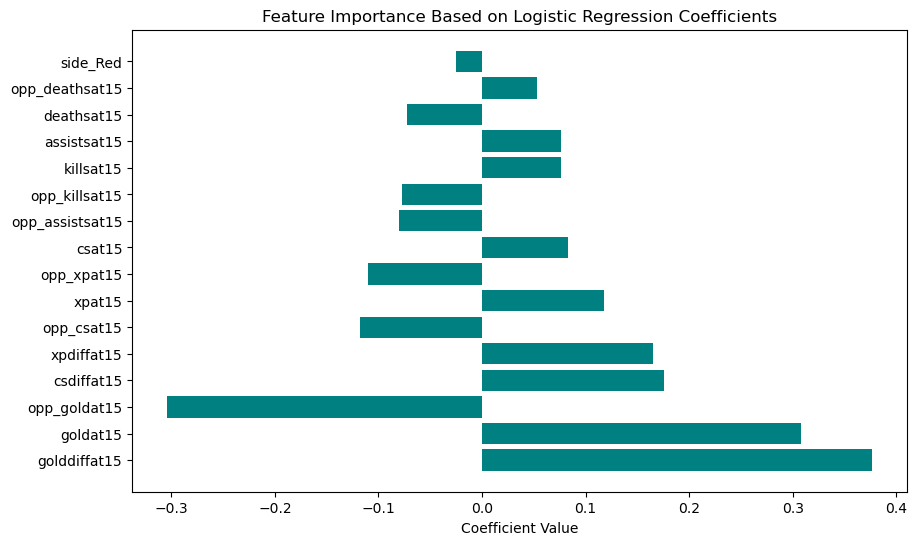

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Get the coefficients from the trained model
coefficients = pipeline.named_steps['logisticregression'].coef_[0]  # For binary classification, we use [0]

# Step 2: Get the feature names (assuming X has column names)
feature_names = X.columns

# Step 3: Create a DataFrame with feature names and their corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Step 4: Sort the features by the absolute value of the coefficient
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Step 5: Print the most important features
print("\nMost Important Features:")
print(feature_importance[['Feature', 'Coefficient']])

# Step 6: Plot the most important features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='teal')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance Based on Logistic Regression Coefficients')
plt.show()


### Random Forest Model: Approximately 0.73 accuracy
### Logistic Regression Model: Approximately 0.74 accuracy

In [59]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Accuracy: 0.7333


In [60]:
from sklearn.svm import SVC
model = SVC(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Accuracy: 0.7394


### Regardless of model type, each is limited at around 0.74 accuracy, which suggests that this is the limit of accuracy for this dataset. Let us set the logistic regression model as our choice, since it has the best accuracy, and perform some more analysis of it.

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       803
           1       0.74      0.76      0.75       824

    accuracy                           0.74      1627
   macro avg       0.74      0.74      0.74      1627
weighted avg       0.74      0.74      0.74      1627

Precision: [0.74902975 0.73770492]
Recall: [0.72104608 0.76456311]
F1-Score: [0.73477157 0.75089392]
ROC-AUC: 0.8217


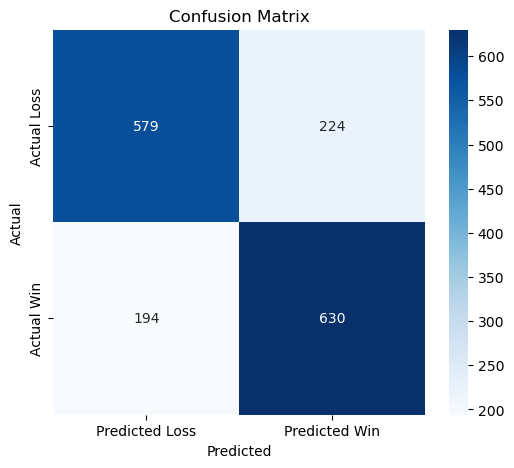

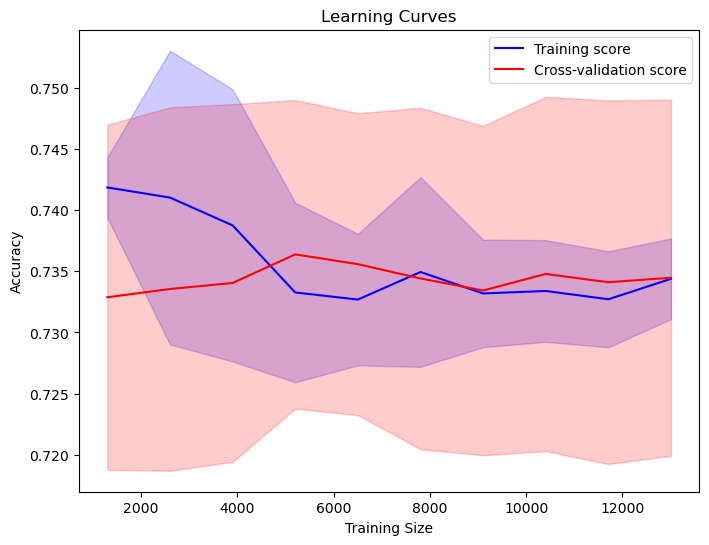

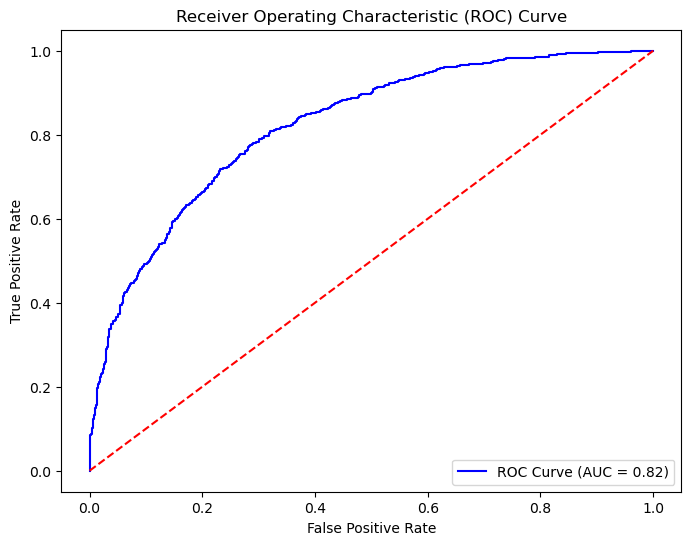

Cross-validation scores: [0.74731018 0.71472487 0.74108241 0.7201722  0.7503075 ]
Mean cross-validation score: 0.7347


In [61]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, precision_recall_fscore_support, roc_auc_score, confusion_matrix, roc_curve
from sklearn.model_selection import learning_curve, cross_val_score

model = pipeline

# Generate predictions
y_pred = model.predict(X_test)

# 1. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 2. Precision, Recall, F1-Score for each class
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# 3. ROC-AUC score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC: {roc_auc:.4f}")

# 4. Confusion Matrix (visualized using seaborn)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Loss', 'Predicted Win'], yticklabels=['Actual Loss', 'Actual Win'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# 5. Feature Importance (for Random Forest models)
if hasattr(model, 'feature_importances_'):
    feature_importances = model.named_steps['randomforestclassifier'].feature_importances_  # Ensure accessing feature_importances correctly
    features = X.columns

    feature_importances_df = pd.DataFrame({
        'Feature': features,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
    plt.title('Feature Importance')
    plt.show()

# 6. Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='red')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)

plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 7. ROC Curve (for binary classification)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc), color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# 8. Cross-validation Results
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores):.4f}")